In [2]:
import os
import SimpleITK as sitk
import numpy as np
import pandas as pd 

from os import walk
import matplotlib.pylab as plt


In [3]:
images_path = '../dataset/'
test_image = "../dataset/1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd"

In [4]:
def load_image(filename):
    image = sitk.ReadImage(filename)
    ct_scan = sitk.GetArrayFromImage(image)

    return ct_scan

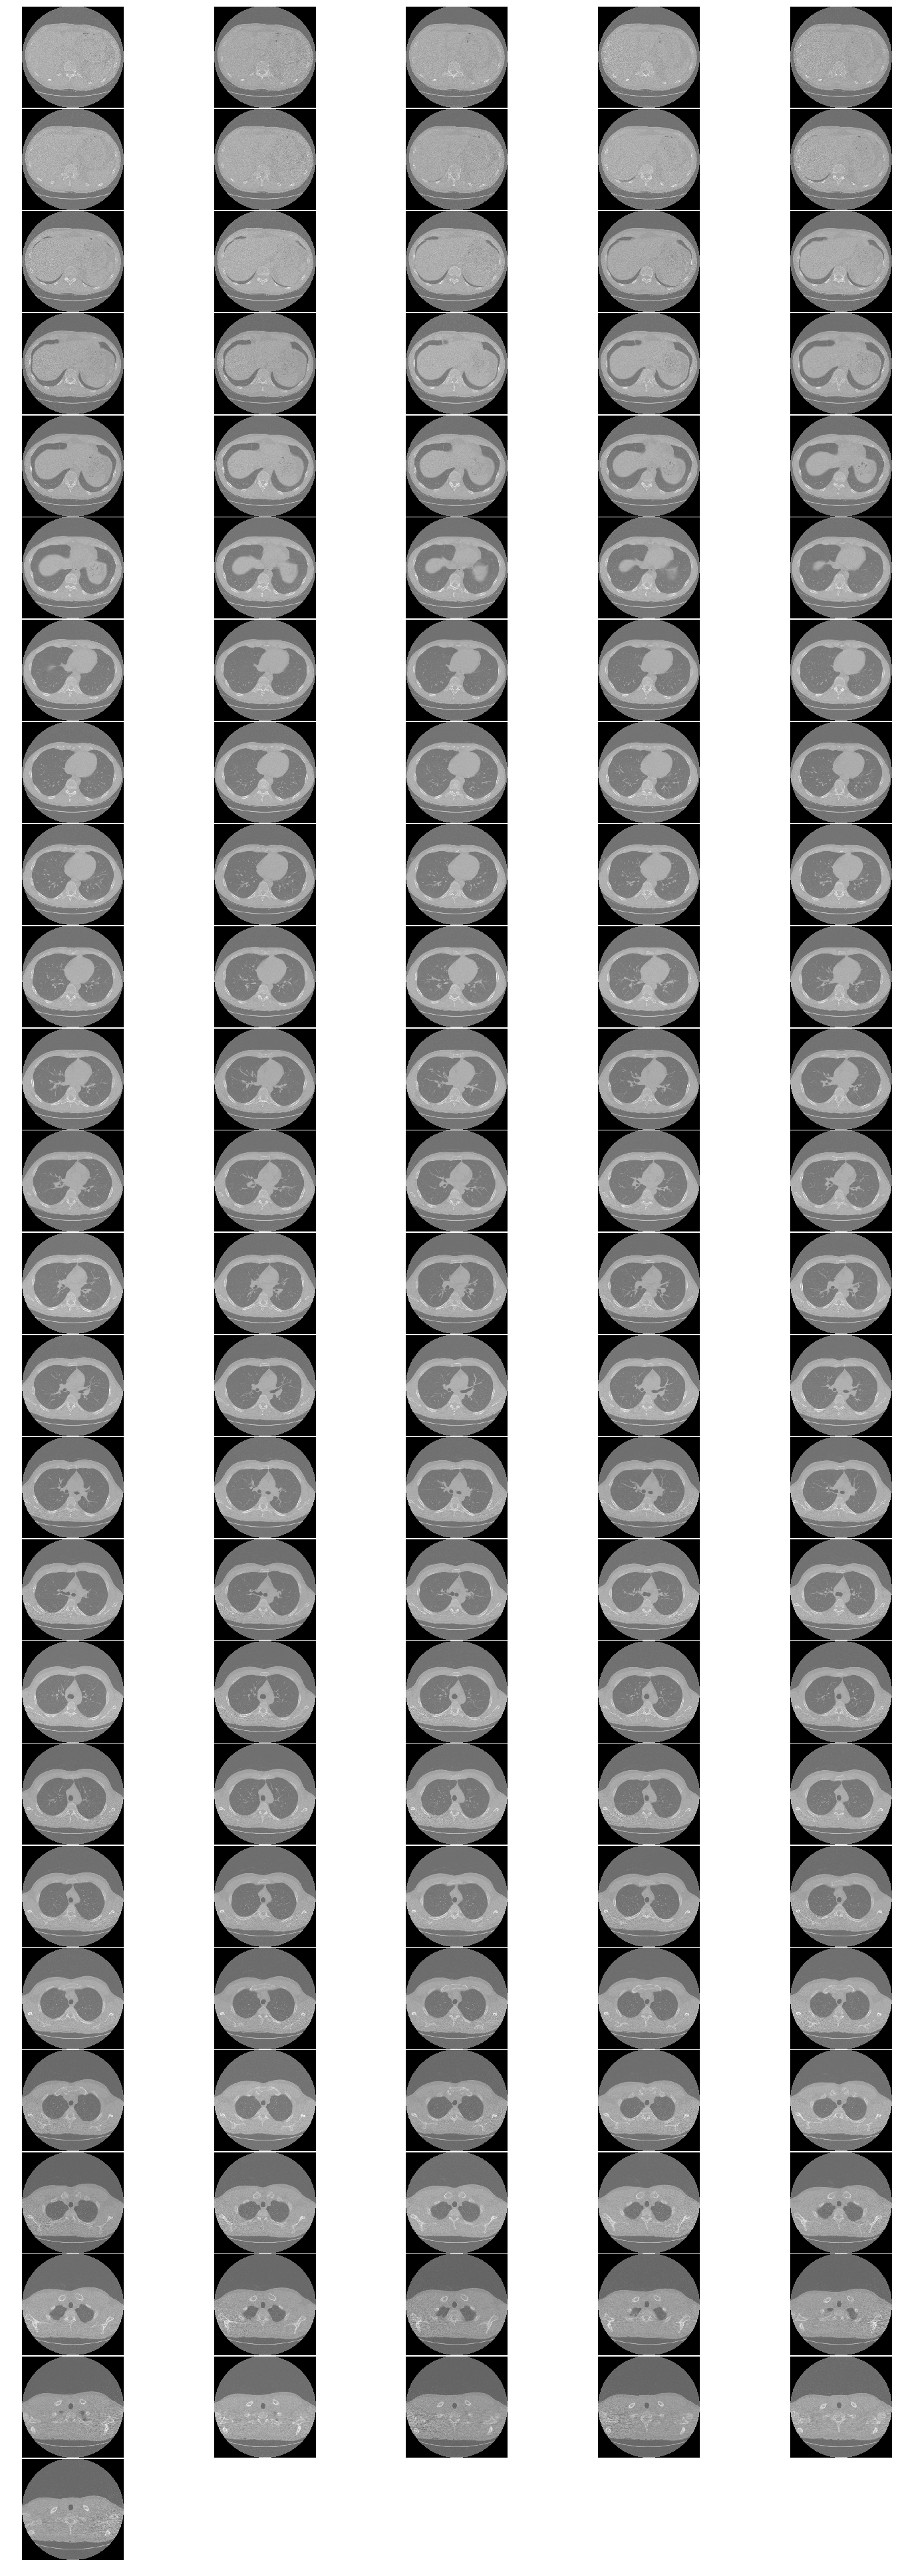

In [9]:
ct_scan = load_image(test_image)
ct_scan[0]

plt.figure(figsize=(20,64))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.01,0.01)
for i in range(ct_scan.shape[0]):
    plt.subplot(30,5,i+1), plt.imshow(ct_scan[i]), plt.axis('off')
plt.show()


In [17]:
for (dirpath, dirnames, files) in walk(images_path):
    for file in files:
        if file.endswith(".mhd"):
            print(images_path+file)

../dataset/1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd
../dataset/1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492.mhd
../dataset/1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059.mhd
../dataset/1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674661221381920536987.mhd
../dataset/1.3.6.1.4.1.14519.5.2.1.6279.6001.122763913896761494371822656720.mhd
../dataset/1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565.mhd
../dataset/1.3.6.1.4.1.14519.5.2.1.6279.6001.126121460017257137098781143514.mhd
../dataset/1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354.mhd
../dataset/1.3.6.1.4.1.14519.5.2.1.6279.6001.128023902651233986592378348912.mhd
../dataset/1.3.6.1.4.1.14519.5.2.1.6279.6001.129055977637338639741695800950.mhd
../dataset/1.3.6.1.4.1.14519.5.2.1.6279.6001.130438550890816550994739120843.mhd
../dataset/1.3.6.1.4.1.14519.5.2.1.6279.6001.134996872583497382954024478441.mhd
../dataset/1.3.6.1.4.1.14519.5.2.1.6279.